In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/netflix_titles_nov_2019.csv'
df = pd.read_csv(file_path)
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


In [4]:
# General info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [5]:
# Count missing values
df.isnull().sum()


,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


In [6]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
show_id,0.000000
title,0.000000
director,32.568100
cast,9.525441
country,7.315402
date_added,10.998801
release_year,0.000000
rating,0.171321
duration,0.000000
listed_in,0.000000


In [7]:
# Unique types
df['type'].value_counts()

# Unique ratings
df['rating'].value_counts()

# Unique countries
df['country'].value_counts().head(10)

# Years distribution
df['release_year'].value_counts().sort_index(ascending=False).head(10)


,count
release_year,
2020,1
2019,762
2018,1040
2017,928
2016,818
2015,502
2014,281
2013,232
2012,174


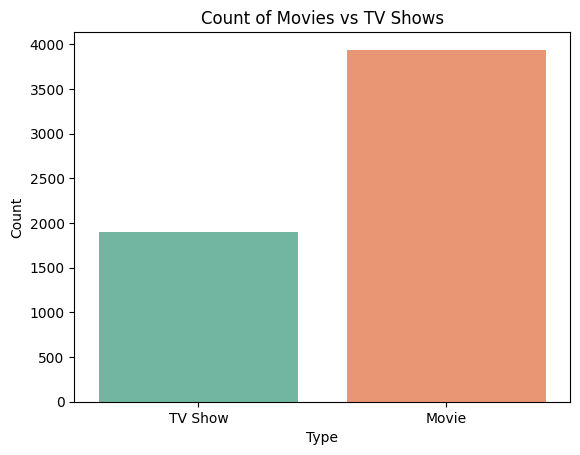

In [8]:
#Movie vs Tv Shows
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type', palette='Set2')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


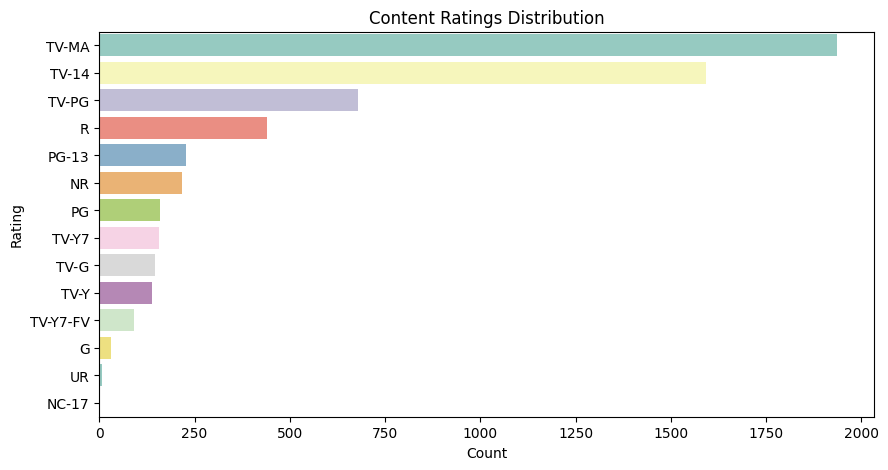

In [9]:
#Rating Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.title("Content Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


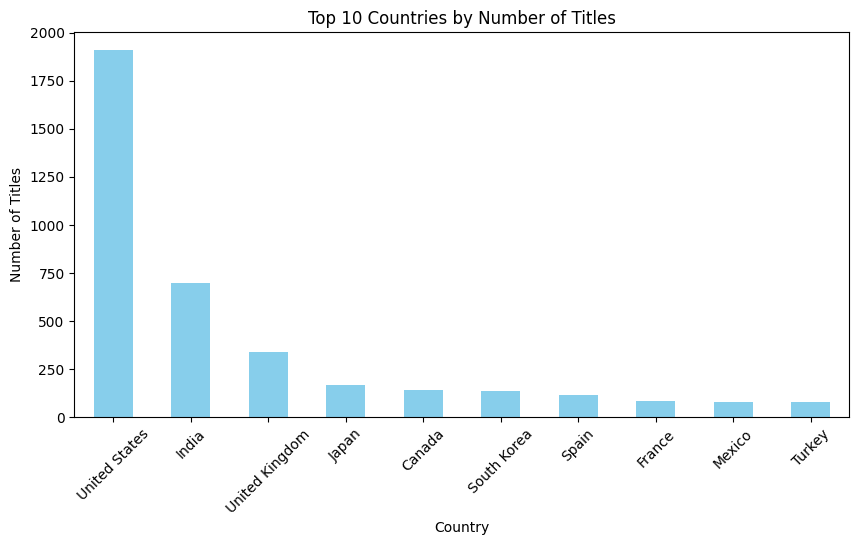

In [10]:
# Top Countries by Content
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


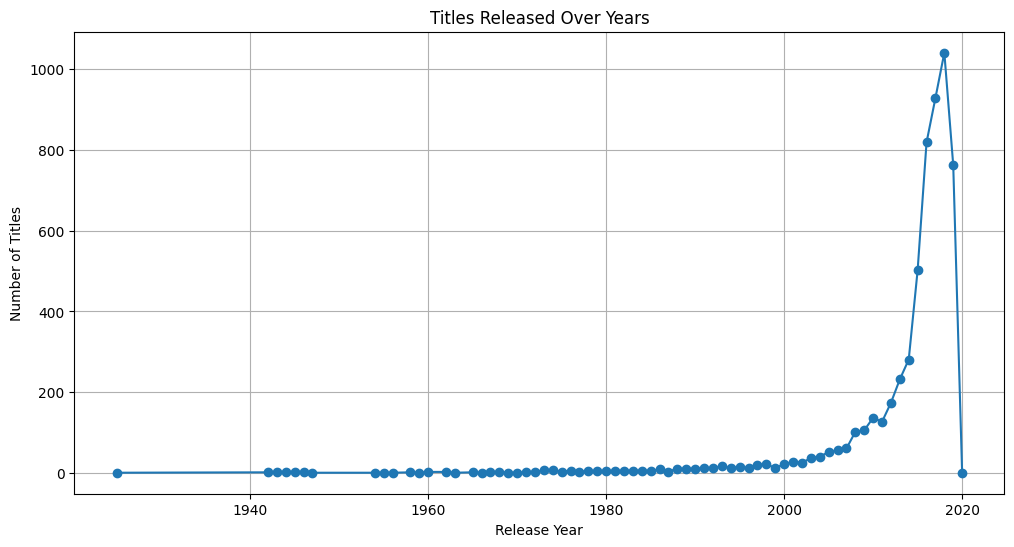

In [11]:
# Titles Over the Years
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Titles Released Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


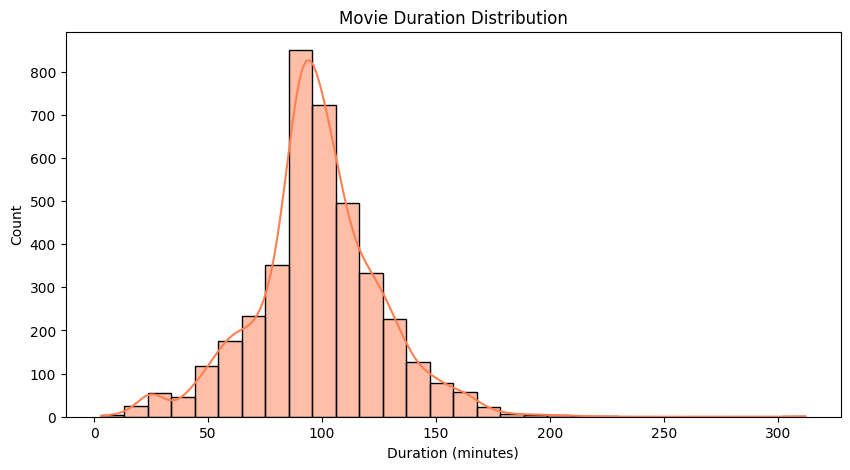

In [12]:
# Separate duration for Movies (in minutes)
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(df_movies['duration_int'], bins=30, kde=True, color='coral')
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


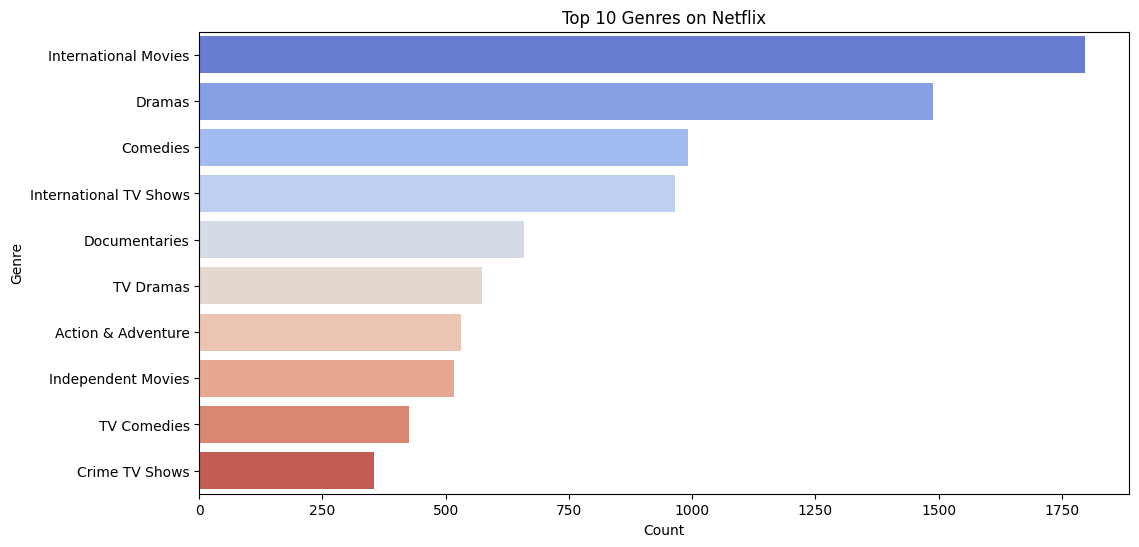

In [13]:
# Split genres (listed_in column)
from collections import Counter

genre_list = sum(df['listed_in'].dropna().apply(lambda x: x.split(',')).tolist(), [])
genre_count = Counter([g.strip() for g in genre_list])

# Convert to DataFrame
genre_df = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='coolwarm')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()
